# Wine Classification Using Unsupervised Learning

This notebook sets out to use unsupervised to determine the class of wine grown based on its attributes.

The [dataset](https://archive.ics.uci.edu/dataset/109/wine), obtained from UC Irvine's Machine Learning Repository, contains the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

The features captured in the dataset are:
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline 

## Preamble

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## Part 1: Explore Data

In [2]:
# fetch dataset
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
df = X.join(y)

print(X.shape)
print(y.shape)

(178, 13)
(178, 1)


In [3]:
# check for null values
df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [4]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [6]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

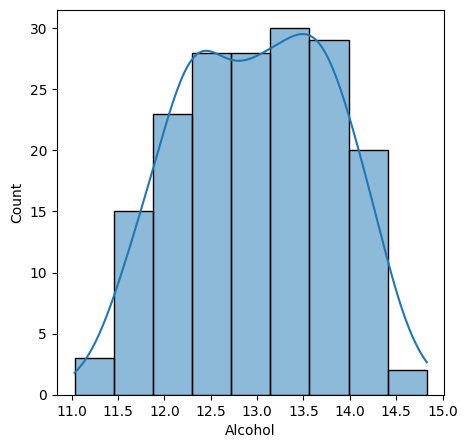

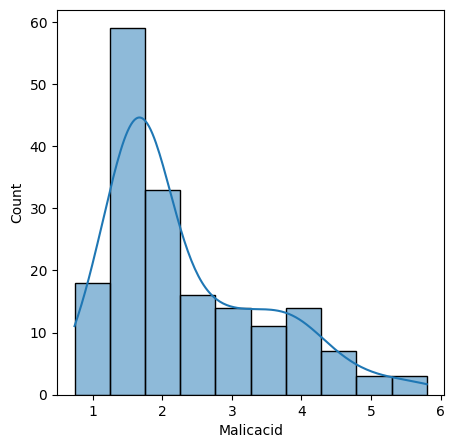

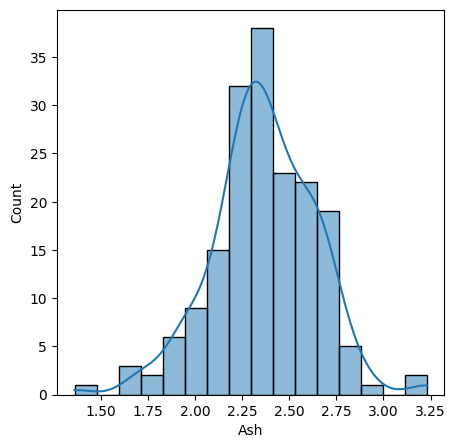

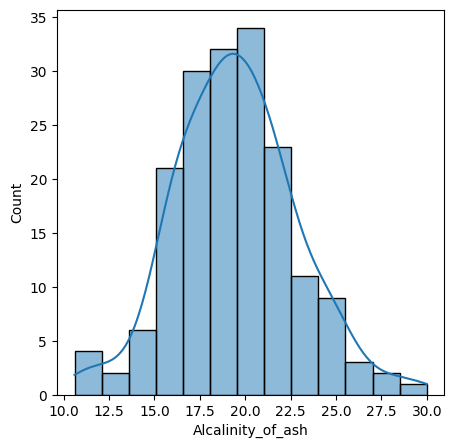

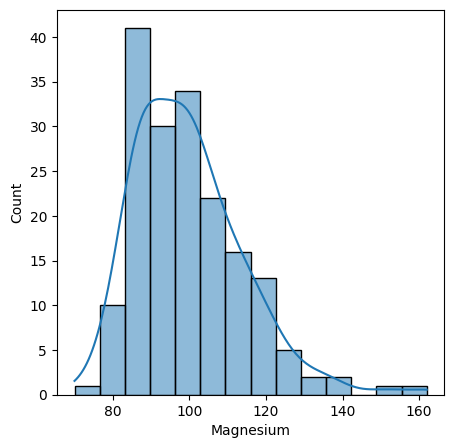

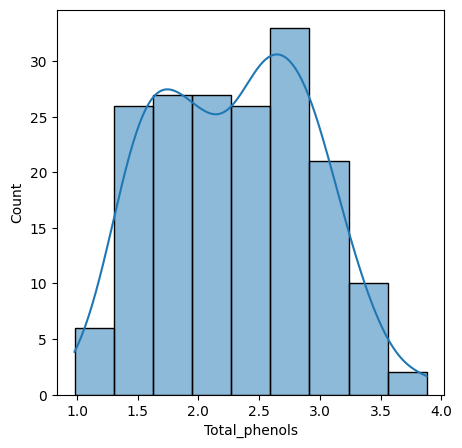

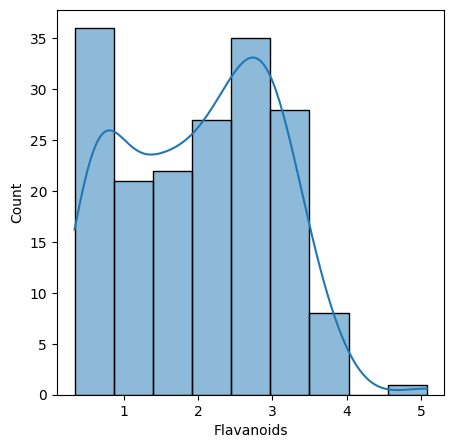

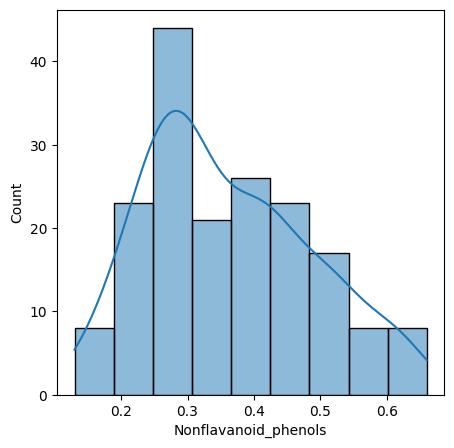

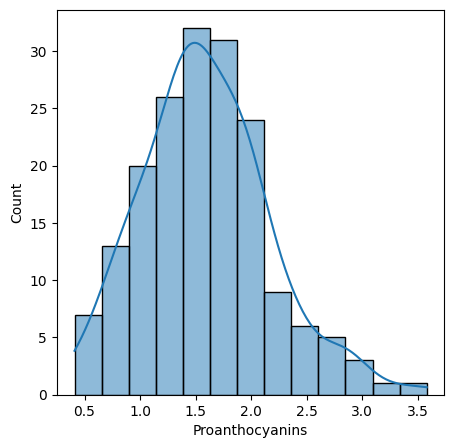

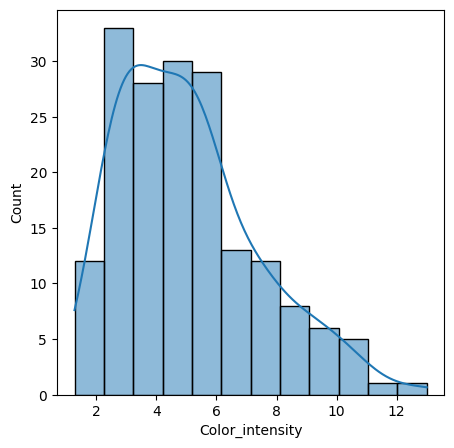

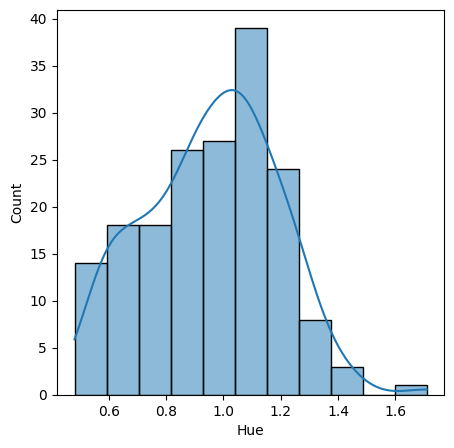

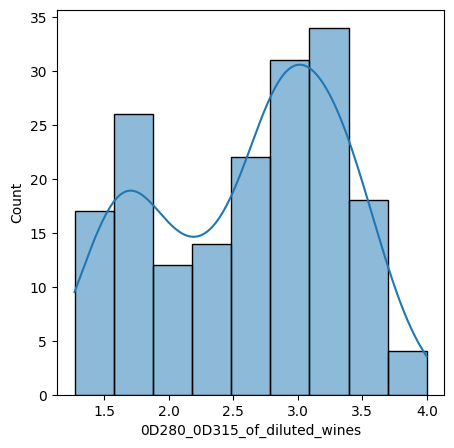

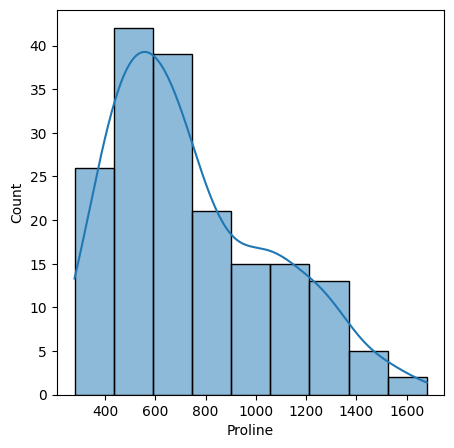

In [7]:
for col in X.columns:
    fig, axs = plt.subplots(figsize=(5,5))
    sns.histplot(data=df,
                 x=col,
                 kde=True,
                 ax=axs)
    plt.show()

class
2        71
1        59
3        48
Name: count, dtype: int64


<Axes: xlabel='class'>

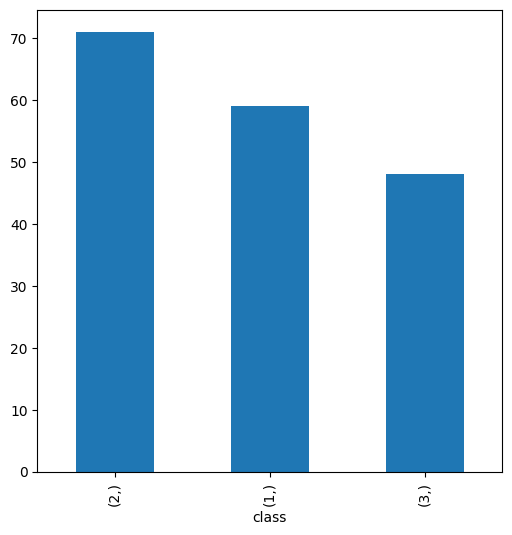

In [8]:
print(y.value_counts())
plt.figure(figsize=(6, 6))
y.value_counts().plot(kind='bar')

Taking a quick look at the dataset, we note that:
- there are 178 rows in the dataset
- there are 13 unique features/columns and 1 target column
- feature data types are numbers
- there are no missing values nor are there duplicates
- the target variables are either class 1, 2, or 3
- target variable distribution breakdown:
    - Class 1: 59 (33.1%)
    - Class 2: 71 (39.9%)
    - Class 3: 48 (27.0%)

<Axes: >

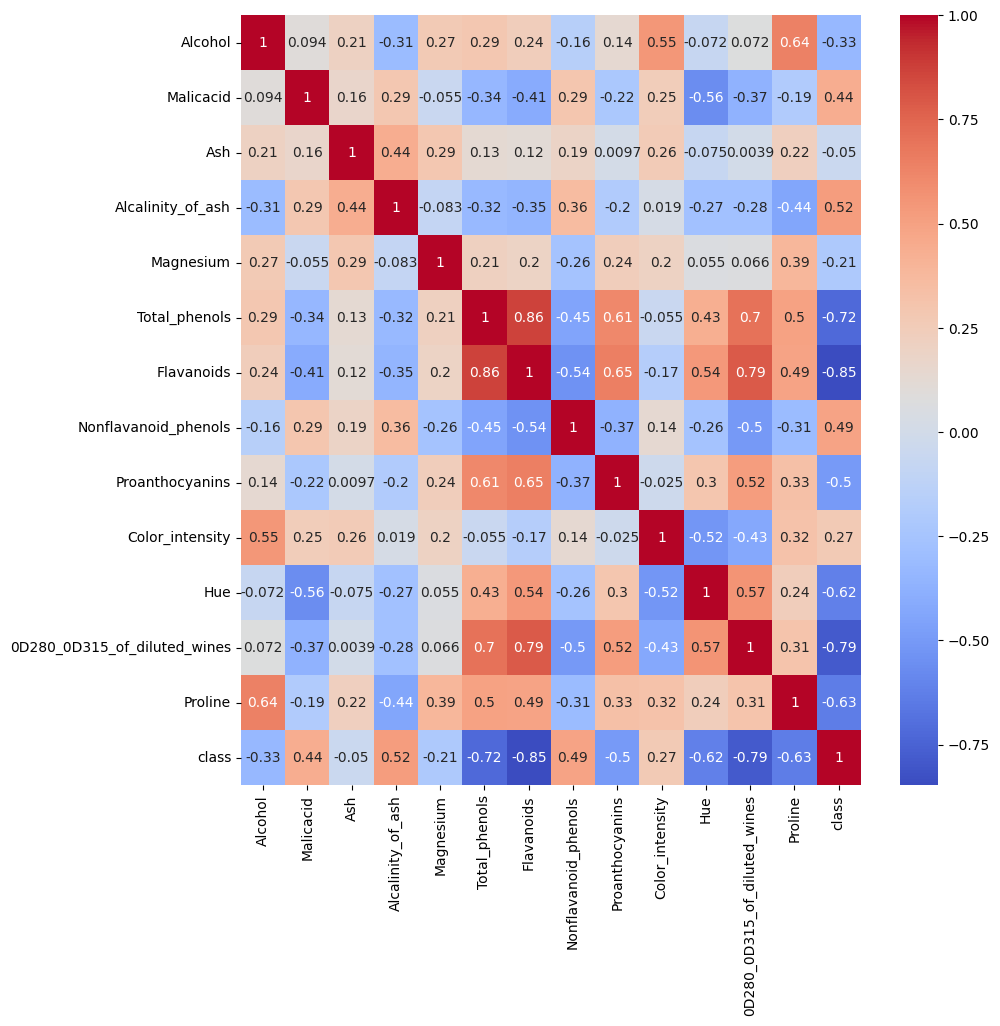

In [9]:
# visualize correlations
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(),
            cmap="coolwarm",
            annot=True,)

In [10]:
corr_class = df.corr()['class']
corr_class[corr_class.abs() > 0.5]

Alcalinity_of_ash               0.517859
Total_phenols                  -0.719163
Flavanoids                     -0.847498
Hue                            -0.617369
0D280_0D315_of_diluted_wines   -0.788230
Proline                        -0.633717
class                           1.000000
Name: class, dtype: float64

The variables with relatively stronger correlations, in absolute terms, are:
- `Alcalinity_of_ash `
- `Total_phenols`
- `Flavanoids`
- `Hue`
- `0D280_0D315_of_diluted_wines`
- `Proline`

## Part 2: Data Preprocessing

In [11]:
# scale data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Part 3: K-Means Clustering

For this section we will use the K-Means clustering algorithm to visualize how classes are grouped by the algorithm.

Based on the dataset, we know that there are 3 classes. But we will be testing K-Means of 2, 3, and 4 and visualize the results.

In [12]:
kmeans_2 = KMeans(n_clusters=2, init='k-means++',random_state=42)
y = kmeans_2.fit_predict(scaled_X)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


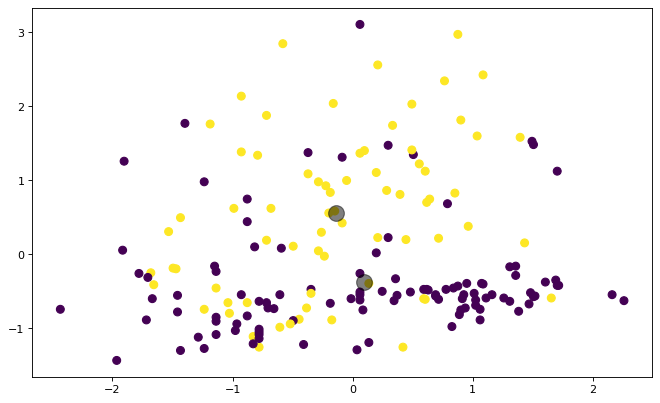

In [13]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans_2.cluster_centers_

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

In [14]:
kmeans_3 = KMeans(n_clusters=3, init='k-means++',random_state=42)
y = kmeans_3.fit_predict(scaled_X)
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


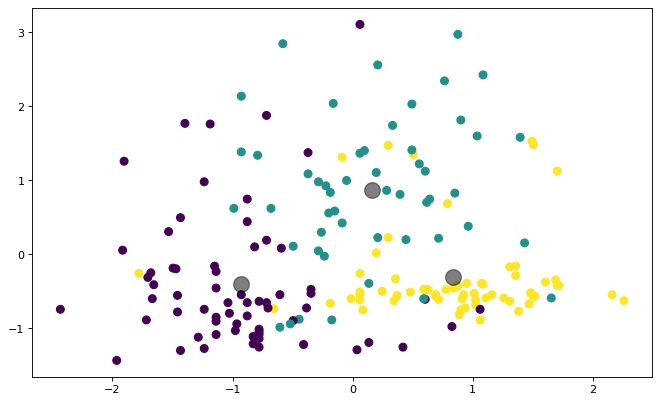

In [15]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans_3.cluster_centers_

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

In [16]:
kmeans_4 = KMeans(n_clusters=4, init='k-means++',random_state=42)
y = kmeans_4.fit_predict(scaled_X)
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 3 3 1 3 0 3 3 0 3 3 0 3 3 3 2
 0 3 3 3 0 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0
 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


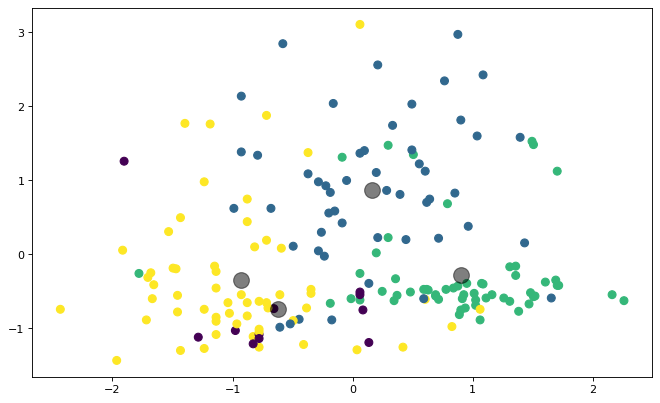

In [17]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=y, s=50, cmap='viridis')

centers = kmeans_4.cluster_centers_

plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

It appears that when K-Means is set to 3, we get the clearest cluster dilineation. To determine if it is truly the best possible value of K, we will use the elbow method.

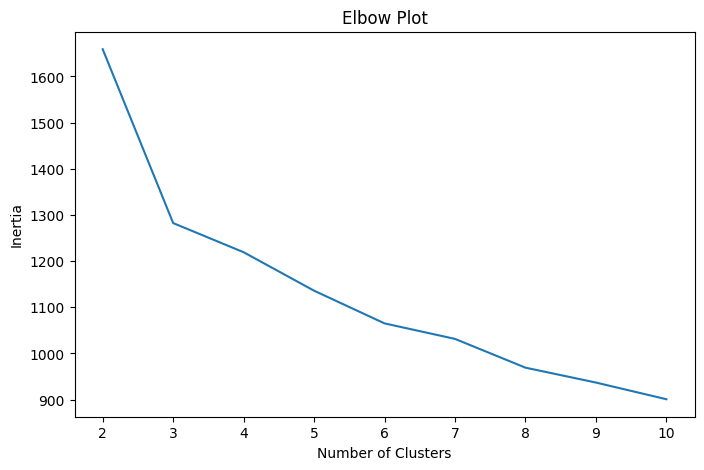

In [18]:
fixed_random_state = random.seed(42)

inertias_1 = []
range_clusters_1 = np.arange(2, 11, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(scaled_X)
    inertias_1.append(kmeans_1.inertia_)

fig, axs = plt.subplots(figsize=(8,5))
sns.lineplot(x=range_clusters_1, y=inertias_1)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
# plt.ylim(bottom=0)
plt.show()

In the visualization above, we see a 'kink' at 3 clusters. Hence the elbow method indicates that the optimal number of clusters is 3.

## Part 4: Hierarchical Clustering

Another clustering algorithm we will use to visualize the clusters is the hierarchical clustering algorithm.

Specifically, we will be using Agglomorative Clustering as it provides us a good visualization of the number of clusters identified.
This clustering algorithm performs hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are succesively merged together.

The algorithm's `linkage` criteria determines the metric used for the merge strategy; here we will set it to `ward` as it will minimize the sum of squared differences within all the clusters.

In [28]:
# create the linkage matrix
Z = linkage(scaled_X, method='ward')

print(f'First 5 rows of Z:\n {Z[0:5]}')

First 5 rows of Z:
 [[  9.          47.           1.16411367   2.        ]
 [131.         133.           1.19160238   2.        ]
 [ 11.          12.           1.20935571   2.        ]
 [ 15.          53.           1.22551046   2.        ]
 [ 92.         107.           1.24538798   2.        ]]


Each row of the linkage matrix `Z` contains 4 values:
- Indices of the merged clusters, `Z[i, 0]` and `Z[i, 1]`
-  Distance between the merged cluster, `Z[i, 2]`
-  Number of points in the new cluster, `Z[i, 3]`

Next, we will plot the dendogram of the linkage matrix.

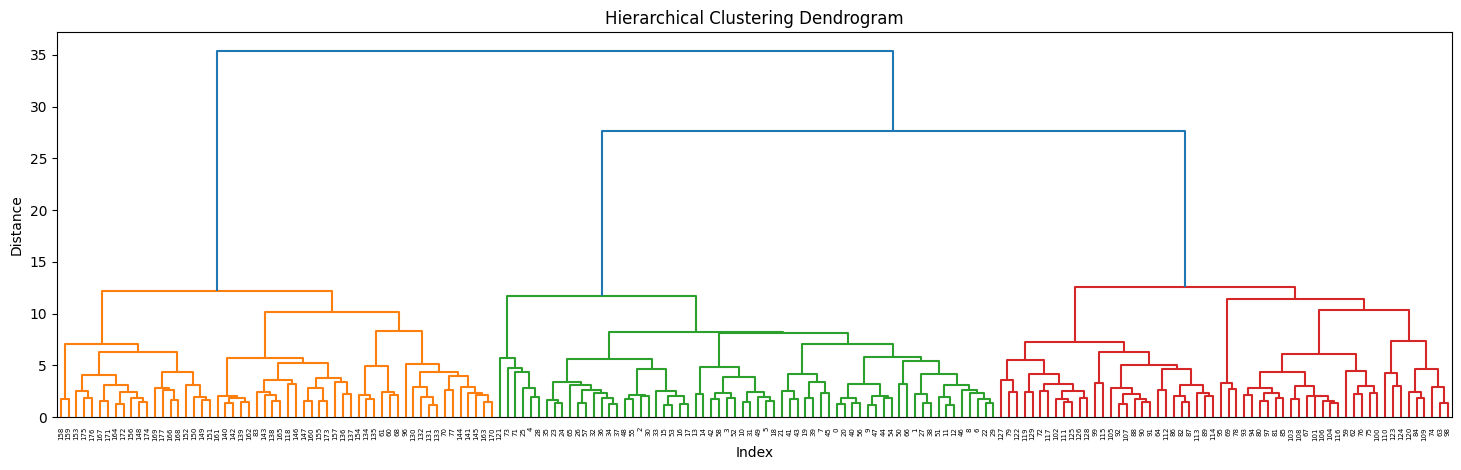

In [19]:
# plot the dendrogram
plt.figure(figsize=(18, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

Each merge corresponds to a node in the dendogram above. The height of each node corrsponds to the distance between the merged cluster.

We see that using hierarchical clustering, the number of clusters identified aligns with the 3 different target classes in the dataet.

We can confirm this using the silhouette score:

In [21]:
# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11): 
    hierarchical_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = hierarchical_cluster.fit_predict(scaled_X)
    silhouette_scores.append(silhouette_score(scaled_X, labels))

silhouette_scores

[np.float64(0.2670131771272231),
 np.float64(0.2774439826952265),
 np.float64(0.225836659334758),
 np.float64(0.18674235566758707),
 np.float64(0.17966642854438503),
 np.float64(0.18685342560226942),
 np.float64(0.18834697102837825),
 np.float64(0.1917169293227209),
 np.float64(0.19856750165505588)]

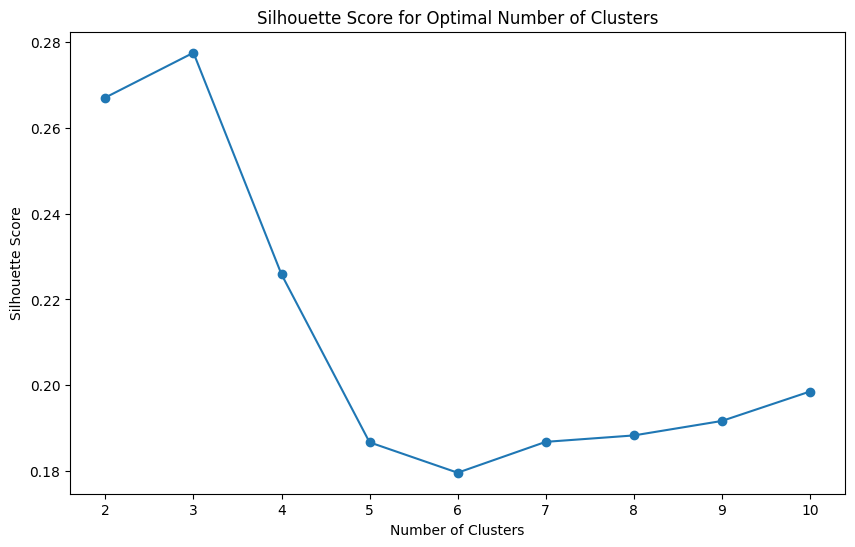

In [22]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The number of clusters with the highest silhouette score is 3, thereby confirming what we observe in the K-Means algorithm and the dataset.

References:
- https://scikit-learn.org/stable/modules/clustering.html#